In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils.gutenberg import get_book

book = get_book(244)

In [4]:
import torch
from langchain.text_splitter import NLTKTextSplitter
from sentence_transformers import SentenceTransformer, util

# turn off warnings
import logging
logging.getLogger().setLevel(logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")
text_splitter = NLTKTextSplitter(
    separator = " ",
    chunk_size = 10,
    chunk_overlap  = 0
)
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

Device: cpu


In [48]:
splits = text_splitter.split_text(book.page_content)
embeddings = model.encode(splits)
print(len(embeddings))
print(len(embeddings[0]))

2208
384


In [80]:
import numpy as np

boundaries = [
  (np.percentile([e[d] for e in embeddings],1), np.percentile([e[d] for e in embeddings],99))
  for d in range(len(embeddings[0]))
]
boundaries[0:10]

[(-0.09512900955975055, 0.1099283650517463),
 (-0.067990278378129, 0.16156577050685875),
 (-0.09324340403079986, 0.11310353681445119),
 (-0.08009530261158943, 0.13214892730116837),
 (-0.09726517669856548, 0.1293475526571273),
 (-0.10330243565142155, 0.09793071642518039),
 (-0.09291234955191612, 0.17837802931666372),
 (-0.11269162595272064, 0.11584323011338704),
 (-0.1394818678498268, 0.10358114697039122),
 (-0.1396924623847008, 0.07991121359169477)]

In [83]:
data = [
  [
    0.0 if boundaries[d][0] <= e[d] <= boundaries[d][1] else e[d]
    for d in range(len(e))
  ] for e in embeddings
]
data[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.10892583,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13988242,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.12574475,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.09298104,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.17057106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [84]:
for i in range(10):
  scores = []
  scores_2 = []
  for j in range(len(embeddings)):
    if i==j: continue
    scores.append((j, float(util.dot_score(embeddings[i], embeddings[j]))))
    scores_2.append((j, float(util.dot_score(data[i], data[j]))))
  scores = sorted(scores, key=lambda x: -x[1])[:10]
  scores_2 = sorted(scores_2, key=lambda x: -x[1])[:10]
  print(i)
  id = set([s[0] for s in scores])
  id2 = set([s[0] for s in scores_2])
  print(id)
  print(id2)
  print(len(id & id2)/len(id), len(id & id2) / len(id | id2))


0
{2, 423, 682, 684, 2093, 79, 218, 27, 2206, 127}
{480, 385, 2, 389, 329, 682, 137, 333, 2095, 220}
0.2 0.1111111111111111
1
{3, 165, 5, 555, 13, 16, 1137, 20, 1560, 28}
{1697, 75, 876, 140, 299, 1264, 756, 1110, 1656, 28}
0.1 0.05263157894736842
2
{3, 165, 5, 555, 16, 18, 20, 1560, 218, 29}
{0, 385, 1574, 1479, 171, 781, 2095, 1169, 855, 29}
0.1 0.05263157894736842
3
{1473, 5, 165, 363, 555, 11, 16, 18, 20, 1560}
{165, 5, 1560, 11, 555, 16, 18, 20, 2104, 25}
0.8 0.6666666666666666
4
{577, 166, 2120, 275, 212, 1110, 313, 282, 414, 703}
{577, 193, 161, 166, 296, 238, 313, 282, 123, 863}
0.4 0.25
5
{1473, 3, 165, 363, 555, 11, 16, 18, 20, 1560}
{1473, 3, 1667, 165, 363, 1548, 16, 18, 22, 1727}
0.6 0.42857142857142855
6
{0, 417, 2, 385, 420, 364, 558, 494, 1373, 637}
{385, 417, 255, 1375, 558, 335, 1360, 850, 829, 1439}
0.3 0.17647058823529413
7
{640, 648, 556, 654, 19, 660, 628, 2078, 668, 542}
{640, 1698, 1573, 648, 556, 1232, 1652, 1431, 2013, 542}
0.4 0.25
8
{3, 9, 555, 688, 16, 20, 

In [43]:
import random
import numpy as np

dim = 384
N = 1000
data = [e[:dim] for e in embeddings[:N]]
# data = [np.array([random.random()-0.5 for j in range(dim)]) for i in range(N)]
# data = [x/np.linalg.norm(x) for x in data]
print(len(data))
print(len(data[0]))

1000
1000


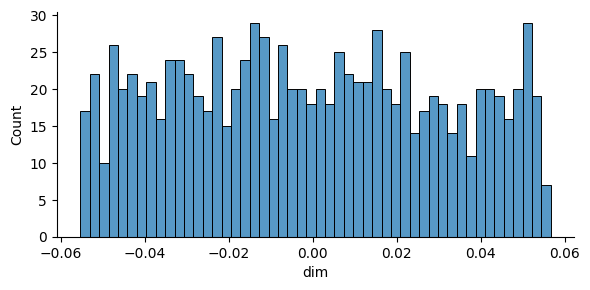

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

df = DataFrame([e[1] for e in data], columns = ['dim'])
sns.displot(df, x='dim', bins=50, height=3, aspect=2)
plt.show()


In [45]:
import numpy as np

for e in data[:10]:
  print(np.linalg.norm(e))

1.0000000000000002
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999


In [46]:
pairs = [float(util.dot_score(data[i], data[j])) for i in range(len(data)) for j in range(i + 1, len(data))]
len(pairs)

499500

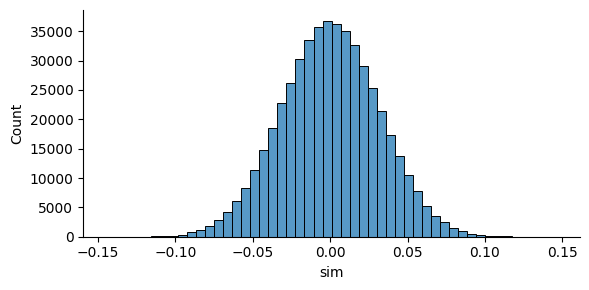

In [47]:
df = DataFrame([d for d in pairs], columns = ['sim'])
sns.displot(df, x='sim', bins=50, height=3, aspect=2)
plt.show()